<a href="https://colab.research.google.com/github/Chidiebere-Ogbuchi/ML-Regression--Predicting-Energy-Efficiency-of-Buildings_Hamoye/blob/main/Machine_Learning_Regression_tag_along_Quiz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Load the dataset
data = pd.read_csv('energydata_complete Quiz Data.csv')

#### Some Exploration

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [ ]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

<Axes: xlabel='RH_1', ylabel='Appliances'>

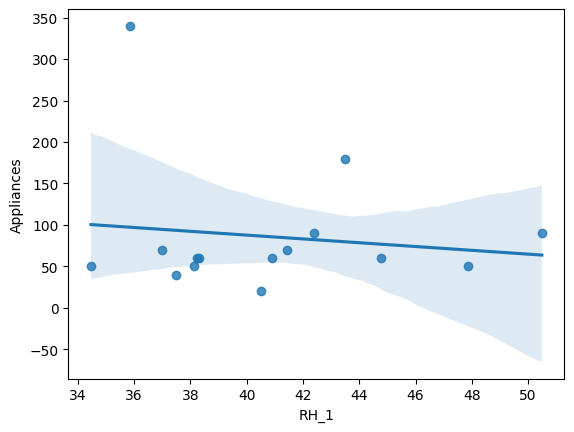

In [ ]:
#Testing simple regression
simple_linear_reg_df = data[['RH_1', 'Appliances']].sample(15, random_state=2)

#Regression Plot
sns.regplot(x="RH_1", y="Appliances", data=simple_linear_reg_df)

### QUIZ Tag Along

In [ ]:
## QUESTION 17

# From the dataset, fit a linear model on the relationship between
# the temperature in the living room in Celsius (x = T2)
# and the temperature outside the building (y = T6).
# What is the Root Mean Squared error in three D.P?

# Extract the features and target variables
X = data["T2"].values.reshape(-1, 1)  # Temperature in the living room (T2)
y = data["T6"].values  # Temperature outside the building (T6)

# Split the dataset into a training and test set (if needed)
# You can use train-test split, cross-validation, or any other method as appropriate

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the RMSE, rounded to three decimal places
print(f"Root Mean Squared Error: {rmse:.3f}")

Root Mean Squared Error: 3.644


###### Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”.
###### Use a 70-30 train-test set split with a  random state of 42 (for reproducibility).
###### Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and
###### transform methods on the train and test set respectively). Run a multiple linear regression
###### using the training set. Answer the following questions:

In [ ]:

# Remove the specified columns
columns_to_remove = ["date", "lights"]
data = data.drop(columns=columns_to_remove)

# Define the target variable and features
X = data.drop(columns=["Appliances"])
y = data["Appliances"]

# Split the dataset into a 70-30 train-test set with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a multiple linear regression model using the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)


In [ ]:
## QUESTION 18
## What is the Mean Absolute Error (in three decimal places) for the  training set?

# Calculate the Mean Absolute Error (MAE) for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)

# Print the MAE for the training set
print(f"Mean Absolute Error (Training Set): {mae_train:.3f}")

Mean Absolute Error (Training Set): 53.742


In [ ]:
## QUESTION 19
## What is the Root Mean Squared Error (in three decimal places) for the training set?

# Calculate the Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate the Root Mean Squared Error (RMSE) for the training set
rmse_train = np.sqrt(mse_train)

# Print the RMSE for the training set, rounded to three decimal places
print(f"Root Mean Squared Error (Training Set): {rmse_train:.3f}")


Root Mean Squared Error (Training Set): 95.216


In [ ]:
## QUESTION 20
## What is the Mean Absolute Error (in three decimal places) for test set?

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE) for the test set
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the MAE for the test set, rounded to three decimal places
print(f"Mean Absolute Error (Test Set): {mae_test:.3f}")


Mean Absolute Error (Test Set): 53.643


In [ ]:
## QUESTION 21
## What is the Root Mean Squared Error (in three decimal places) for test set?

# Calculate the Mean Squared Error (MSE) for the test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate the Root Mean Squared Error (RMSE) for the test set
rmse_test = np.sqrt(mse_test)

# Print the RMSE for the test set, rounded to three decimal places
print(f"Root Mean Squared Error (Test Set): {rmse_test:.3f}")


Root Mean Squared Error (Test Set): 93.640


In [ ]:
## QUESTION 22
## Did the Model above overfit to the training set

overfitting = mae_test - mae_train
print(f"overfitting: {overfitting:.3f}")

overfitting: -0.099


In [ ]:
## QUESTION 23

##Train a ridge regression model with default parameters.
## Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

# Train a Ridge regression model with default parameters
ridge_model = Ridge()

# Fit the model to the training set
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = ridge_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE) for the test set
ridge_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the RMSE for the test set
print(f"Ridge Root Mean Squared Error (Test Set) with Ridge Regression: {ridge_rmse_test:.3f}")

Ridge Root Mean Squared Error (Test Set) with Ridge Regression: 93.709


In [ ]:
#Calculate the ridge difference

ridge_diff = rmse_test - ridge_rmse_test
# Print the RMSE for the test set
print(f"Ridge Root Mean Squared Error (Test Set) with Ridge Regression: {ridge_diff:.3f}")

Ridge Root Mean Squared Error (Test Set) with Ridge Regression: -0.068


In [ ]:
## QUESTION 24

# Train a lasso regression model with default value and obtain the new feature weights with it.
# How many of the features have non-zero feature weights?

# Train a Lasso regression model with default parameters
lasso_model = Lasso()

# Fit the model to the data
lasso_model.fit(X, y)

# Get the feature weights (coefficients)
feature_weights = lasso_model.coef_

# Count the number of features with non-zero feature weights
non_zero_features = sum(feature_weights != 0)

# Print the count of features with non-zero feature weights
print(f"Number of features with non-zero feature weights: {non_zero_features}")

Number of features with non-zero feature weights: 19


In [ ]:
## QUESTION 25

# What is the new RMSE with the Lasso Regression on the test set?

# Train a Lasso regression model with default parameters
lasso_model = Lasso()

# Fit the model to the training set
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = lasso_model.predict(X_test)

# Calculate the RMSE for the test set
Lasso_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the RMSE for the test set
print(f"Lasso Root Mean Squared Error (Test Set) with Lasso Regression: {Lasso_rmse_test:.3f}")

Lasso Root Mean Squared Error (Test Set) with Lasso Regression: 99.424
